# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Bagaskara
- **Email:** bagaskara.kien@gmail.com
- **ID Dicoding:** bagasskr12

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh dari perubahan musim yang terjadi sepanjang tahun terhadap jumlah penyewaan?
- Bagaimana kondisi distribusi penyewaan saat pagi, siang, sore ataupun malam?
- Bagaimana perbedaan pola penyewaan saat hari kerja dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Mengambil data csv
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

In [3]:
# Menampilkan Tabel data day_df
display(day_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Menampilkan Tabel data hour_df
display(hour_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Digunakan command *pd*.*read_csv* untuk mengambil file yang telah diupload yang sesuai dengan path file nya dan menggunakan command *display(file.head())* untuk menampilkan hasil dari file yang telah di upload dan diambil.
- Pada proses ini menggunakan 2 dataset dengan nama file *day.csv* dan *hour.csv*, yang berisikan segala informasi atau data yang akan digunakan untuk dianalisis datanya.
- Terdapat dua tabel yang dihasilkan dari 2 file csv yang telah diupload, yaitu Tabel days dan juga Tabel hour yang keduanya berbeda isi tabelnya.

### Assessing Data

**Assesing data day_df :**

In [5]:
# Informasi dari day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# deskriptif statistik dari day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# Memeriksa missing values dari day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# Memeriksa duplikasi day_df
print("Total duplikasi terdeteksi : ", day_df.duplicated().sum())

Total duplikasi terdeteksi :  0


**Assesing data hour_df :**

In [9]:
# Informasi dari hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Deskriptif statistik dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# Memeriksa missing values dari hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
# Memeriksa duplikasi hour_df
print("Total duplikasi terdeteksi : ", hour_df.duplicated().sum())

Total duplikasi terdeteksi :  0


**Insight:**
- Dilakukan Assesing Data yang terpisah antara *hour_df* dan *day_df* dengan command yang sama yaitu, *.info()*, *.describe()*, *.isnull().sum()* dan *.duplicated().sum()*.
- Saat dilakukan Proses Assesing Data ini, didapatkan tujuan untuk mengubah beberapa tipe data dari kolom pada DataFrame. Kolom yang diubah antara lain *dteday* yang mulanya object menjadi datetime, lalu kolom *season* menjadi category, dan kolom *hr* berubah menjadi category.

### Cleaning Data

**Cleaning Data day_df :**


In [17]:
# Cleaning Data day_df mengubah tipe data
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["season"] = day_df["season"].astype("category")

In [18]:
# Tampilan setelah Cleaning data
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(1), datetime64

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Cleaning Data hour_df mengubah tipe data
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df['season'].astype('category')
hour_df['hr'] = hour_df['hr'].astype('category')

In [20]:
# Tampilan hasil Cleaning data
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terlihat pada DataFrame day_df setelah dilakukan Cleaning Data yaitu mengubah tipe data pada kolom dteday menjadi datetime dan season menjadi category, telah berubah tipe datanya.

- Terlihat pada DataFrame day_df setelah dilakukan Cleaning Data yaitu mengubah tipe data pada kolom dteday menjadi datetime dan season menjadi category dan juga pada kolom hr menjadi category, telah berubah tipe datanya.

## Exploratory Data Analysis (EDA)

### Eksplorasi Tabel day_df dan hour_df

In [21]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,NaN,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,NaN,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,NaN,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,NaN,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Mengelompokkan data berdasarkan musim

In [23]:
by_season_data = day_df.groupby('season', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})
by_season_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
by_season_data = by_season_data.reset_index()

print(by_season_data)

  season  Max Count  Min Count  Average Count  Total Count
0      1       7836        431    2604.132597       471348
1      2       8362        795    4992.331522       918589
2      3       8714       1115    5644.303191      1061129
3      4       8555         22    4728.162921       841613


### Mengelompokkan data berdasarkan jam


In [24]:
total_perjam_peminjaman = hour_df.groupby('hr')['cnt'].sum()
total_perjam_peminjaman

<ipython-input-24-90a862d4cf6c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_perjam_peminjaman = hour_df.groupby('hr')['cnt'].sum()


,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


### Rata-rata peminjaman per jam

In [25]:
avg_peminjaman = hour_df.groupby('hr')['cnt'].mean().round()
avg_peminjaman

<ipython-input-25-322fdb8f4a9f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_peminjaman = hour_df.groupby('hr')['cnt'].mean().round()


,cnt
hr,
0,54.0
1,33.0
2,23.0
3,12.0
4,6.0
5,20.0
6,76.0
7,212.0
8,359.0


### Pengelompokkan berdasarkan hari kerja dan weekend

In [26]:
harikerja_data = day_df.groupby('workingday')['cnt'].mean()
harikerja_data

,cnt
workingday,
0,4330.168831
1,4584.820000


**Insight:**
- Didapatkan hasil pada proses ini berupa hasil analisis mengenai penyewaan berdasarkan musim, berdasarkan jam dan rata rata jamnya, dan berdasarkan hari kerja ataupun akhir pekan.
- Berdasarkan musim, angka penyewaan sepeda paling banyak ditunjukkan pada angka 3 yang merupakan musim panas atau Summer, sedangkan paling sedikit ada di musim dingin atau Winter yang ditunjukkan nomor 1.
- Berdasarkan Jam, orang - orang paling banyak melakukan penyewaan sepeda pada jam 17 sore hari dan paling sedikit pada jam 4 dini hari. Rata rata jam penyewaannya juga terdapat pada jam 17.
- Berdasarkan perbandingan penyewaan sepeda di hari kerja dan akhir pekan ini, rata rata orang melakukan penyewaan di hari kerja namun hanya selisih sedikit atau berbeda sedikit dengan akhir pekannya. Akhir pekan atau hari selain hari kerja ditandakan dengan angka 0 dan hari kerja ditandakan dengan angka 1.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh dari perubahan musim yang terjadi sepanjang tahun terhadap jumlah penyewaan?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


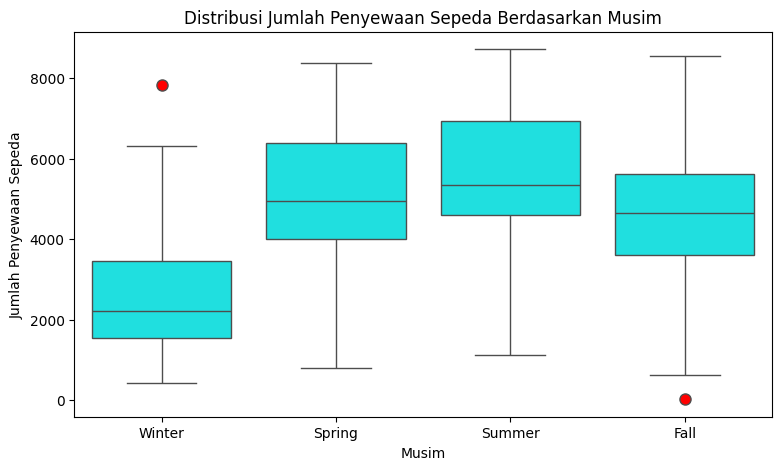

In [37]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='season', y='cnt', data=day_df, color="Cyan", flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

### Pertanyaan 2: Bagaimana kondisi distribusi penyewaan saat pagi, siang, sore ataupun malam?


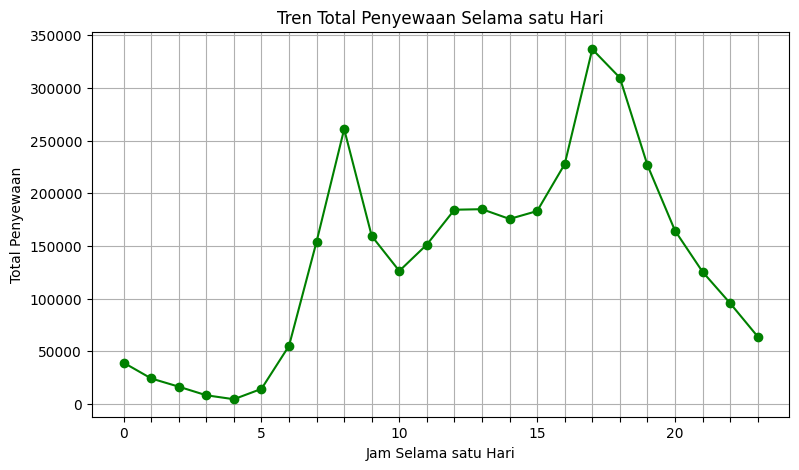

In [38]:
plt.figure(figsize=(9, 5))

total_perjam_peminjaman.plot(kind='line', marker='o', color='green')
plt.xlabel('Jam Selama satu Hari')
plt.ylabel('Total Penyewaan')
plt.title('Tren Total Penyewaan Selama satu Hari')
plt.xticks(total_perjam_peminjaman.index)
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana perbedaan pola penyewaan saat hari kerja dengan akhir pekan?


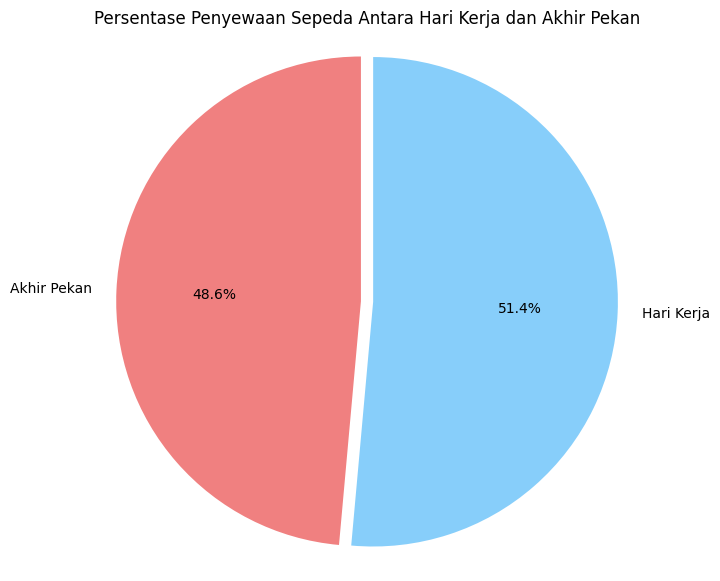

In [46]:
labels = ['Akhir Pekan', 'Hari Kerja']
explode = (0.05, 0)

plt.figure(figsize=(7, 7))
plt.pie(harikerja_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#F08080','#87CEFA'], explode=explode)
plt.title('Persentase Penyewaan Sepeda Antara Hari Kerja dan Akhir Pekan')
plt.axis('equal')
plt.show()

**Insight:**
- Visualisasi hasil analisis yang meliputi 3 pertanyaan yang telah ditentukan sebelumnya dan hasilnya sesuai saat proses EDA.
- Untuk pertanyaan 1, musim yang paling banyak menyewa sepeda terdapat pada musim Summer atau musim panas.
- untuk pertanyaan 2, penyewaan paling banyak dilakukan pada jam 17 sore hari.
- Untuk pertanyaan 3, penyewaan sepeda rata rata dilakukan pada hari kerja dengan selisih yang cukup sedikit yaitu kurang dari 5%.

## Conclusion

- **Conclution pertanyaan 1 :** Terdapat pengaruh musim terhadap peminjaman atau penyewaan sepeda. Terlihat pada grafiknya, bahwa musim panas memiliki total peminjaman sepeda yang lebih tinggi dengan median yang lebih tinggi dibandingkan musim lainnya. Hal ini menunjukkan bahwasannya pada musim panas merupakan waktu yang populer untuk meminjam sepeda, yang kemungkinan cuacanya lebih hangat dan membuat bersepeda lebih nyaman.
- **Conclution pertanyaan 2 :** Terlihat dari gambar Tren yang dihasilkan, puncak peminjaman terjadi pada sore hari di jam 17.00, sedangkan paling sedikit peminjaman terjadi pada dini hari di jam 4.00. Dari gambar tren bisa dimanfaatkan untuk menyusun rencana lebih lanjut agar peminjaman sepeda harus selalu sedia saat sore hari agar mendapatkan keuntungan yang maksimal.
- **Conclution pertanyaan 3 :** Terlihat pada gambar Piechart yang digambarkan, rata rata orang meminjam pada Akhir pekan sebanyak 51.4% dan sedangkan rata rata orang meminjam pada Hari Kerja sebanyak 48.6%. Hal ini menandakan bahwasannya peminjaman sepeda pada Akhir Pekan lebih banyak dibandingkan dengan Hari Kerja, walaupun sedikit kemungkinan orang - orang lebih banyak menyewa pada Akhir Pekan dengan alasan melepaskan penat dan menikmati hari.